In [1]:
import tensorflow as tf

from data_loader.ISPRS_data_loader import ISPRSLoader
from models.fcn_base_model import FcnBaseModel
from trainers.aerial_image_trainer import AerialImageTrainer
# from models.unet_model import UNetModel
# from trainers.road_trainer import RoadTrainer

from utils.config import process_config
from utils.dirs import create_dirs
from utils.logger import Logger
from utils.utils import get_args
import matplotlib.pyplot as plt
import os 

json_file = "configs/fcn_ISPRS_Vaihingen_config.json"
json_file

config = process_config(json_file)
print(config)

accuracy: sparse_categorical_crossentropy
batch_size: 4
checkpoint_dir: ./experiments\fcn_Vaihingen\checkpoint/
data_path: C:\Users\TT260256\My Project\NNs\ISPRS_benchmarks_datasets\Vaihingen\
exp_name: fcn_Vaihingen
final_model_dir: ./experiments\fcn_Vaihingen\saved_model/
image_size:
- 256
- 256
- 3
learning_rate: 0.01
loss: scce
max_to_keep: 5
n_classes: 2
num_epochs: 30
num_iter_per_epoch: 300
summary_dir: ./experiments\fcn_Vaihingen\summary/



In [2]:
data = ISPRSLoader(config)

Yeah this is the path to dataset : C:\Users\TT260256\My Project\NNs\ISPRS_benchmarks_datasets\Vaihingen\
Training set : 11 images, Validation set : 5 images
Size of normalized training images :  (1442, 256, 256, 3)
Size of normalized validation images :  (325, 256, 256, 3)
Size of normalized training masks :  (1442, 256, 256)
Size of normalized validation masks :  (325, 256, 256)


(256, 256, 3)
(256, 256)


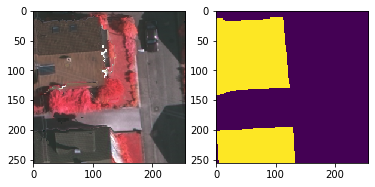

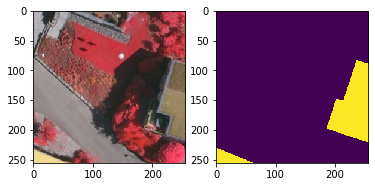

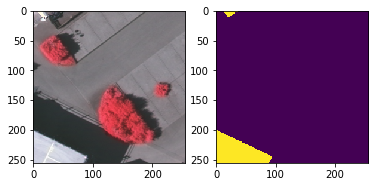

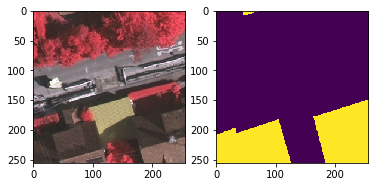

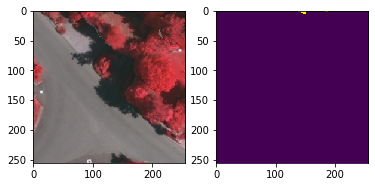

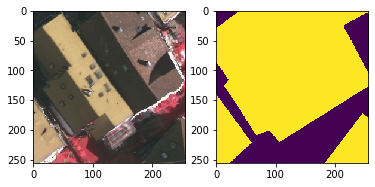

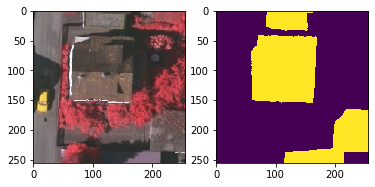

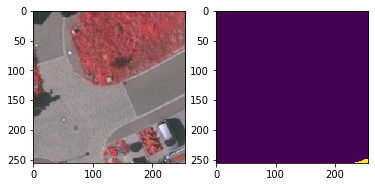

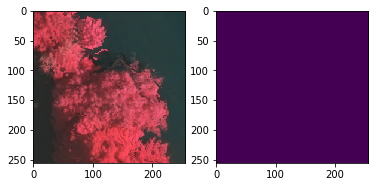

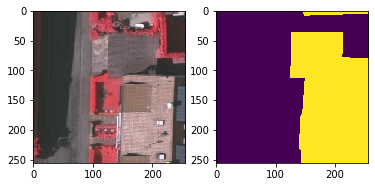

In [3]:
print(data.train_norm_image[0].shape)
print(data.train_norm_mask[0].shape)
for i in range(10):
    plt.subplot(121)
    plt.imshow(data.train_norm_image[i])
    plt.subplot(122)
    plt.imshow(data.train_norm_mask[i])
    plt.show()

In [4]:
tf.reset_default_graph()
model = FcnBaseModel(config)
model.build()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Use keras.layers.conv2d_transpose instead.
Model built successfully.


In [ ]:
sess = tf.Session()
logger = Logger(sess,config)
trainer = AerialImageTrainer(sess,model,data,config,logger)
trainer.train()
# model.load(sess)

Variables initialized
Epoch  0


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [02:14<00:00,  2.28it/s]


-->Last epoch loss     :  0.516312
-->Last epoch accuracy :  0.734378
-->Last test loss      :  0.424778
-->Last test accuracy  :  0.751583
[BEST LOST : 0.4247778356075287]
Saving model...
Model saved
Epoch  1


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [02:19<00:00,  2.16it/s]


-->Last epoch loss     :  0.402766
-->Last epoch accuracy :  0.797639
-->Last test loss      :  0.312953
-->Last test accuracy  :  0.859596
[BEST LOST : 0.31295275688171387]
Saving model...
Model saved
Epoch  2


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [02:13<00:00,  2.19it/s]


-->Last epoch loss     :  0.330525
-->Last epoch accuracy :  0.856797
-->Last test loss      :  0.299769
-->Last test accuracy  :  0.871004
[BEST LOST : 0.2997688353061676]
Saving model...
Model saved
Epoch  3


 32%|█████████████████████████▉                                                       | 96/300 [00:43<01:30,  2.25it/s]

In [ ]:
model.load(sess)
print(model.best_loss.eval(sess))
test = [data.get_data_element("valid_data",i) for i in range(5)]
for item in test :
    img = item[0]
    mask = item[1]
    model.predict(sess,img,mask)